# WS 2.4: Atmospheric Pressure

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.4, Time series analysis. For: December 4, 2024.*

In this workshop we will analyze Atmospheric pressure data. The data is a time series of atmospheric pressure measurements over a period of 2 years, with measurements taken every 4 hours. The first column is the time in days, the second column is the atmospheric pressure in hPa.

In this workshop we will analyze the time series. We will first fit a functional model to the data in order to stationarize the data. Then we will address the remaining noise and establish a stochastic model by fitting an AR(1) model to the residuals.

We begin by loading the data and plotting it.

## Part 0.1: Load the data and plot it
This week we are using a new library called `statsmodels`. This library is very useful for time series analysis. If you don't have it installed, you can install it by running `!pip install statsmodels` in a code cell. You can also install it by running `pip install statsmodels` in a terminal of your choice (make sure you are in the right environment activated!).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import chi2
from scipy.signal import periodogram

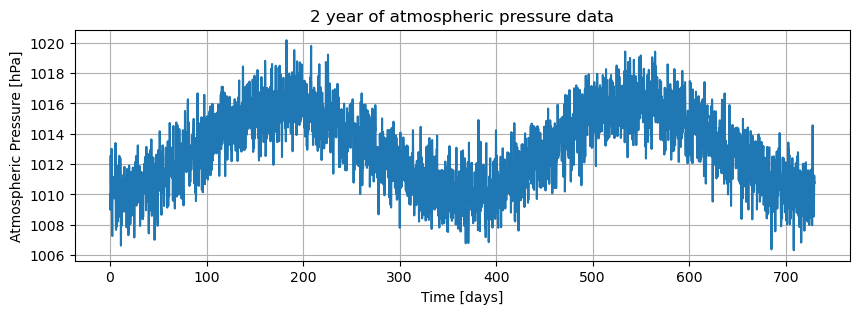

In [ ]:
data = np.loadtxt('atm_data.txt', delimiter=',')
time = data[:, 0]
data = data[:, 1]

# dt = YOUR_CODE_HERE # Time step
# fs = YOUR_CODE_HERE # Sampling frequency

# SOLUTION
dt = time[1] - time[0]
fs = 1 / dt

plt.figure(figsize=(10, 3))
plt.plot(time, data)
plt.xlabel('Time [days]')
plt.ylabel('Atmospheric Pressure [hPa]')
plt.title('2 year of atmospheric pressure data')
plt.grid(True)


## Part 1: Finding frequencies of periodic patterns

We clearly see that the data contains a seasonal pattern. We will start by fitting a functional model to the data in order to make the data stationary. To find the frequency of the seasonal pattern we will use the power spectrum of the data.

The time series may be influenced by multiple periodic signals at different frequencies; therefore we will apply a method to find the dominant frequency, and then iteratively remove the corresponding signal from the data.

We will create a function `find_frequency` that will take the data and an $\mathrm{A}$-matrix as input and return the frequency of the most dominant periodic signal. Note that we cannot have an empty A-matrix when running the function for the first time. Therefore, we first define an A matrix for a linear model that accounts for an intercept and slope, with which `find_frequency` will then de-trend the time series.

The function will look like this:

1. Using the $\mathrm{A}$-matrix we will fit a model to the data using the least squares method. 
2. We will calculate the PSD of the residuals of the model.
3. We will find the frequency of the most dominant periodic signal in the PSD.
4. Optional: we can plot the power spectrum of the data with the highest peak.



### Create the necessary functions

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.1:</b>   

Read the code in the next Python cell study the contents until you understand what the functions are doing. Then complete the missing parts of the code.

</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Tip:</b>
We will write functions that return multiple parameters, but if we are not interested in defining a particular parameter we can use `_` to ignore it. For example, if we write <code>_, b = function(a)</code>, we only define the second output of the function; the first output is not stored in a variable.</p></div>

In [ ]:
def fit_model(data, time, A, plot=False):
    '''
    Function to find the least squares solution of the data
    data: input data
    time: time vector
    A: A-matrix to fit the data
    plot: boolean to plot the results or not
    '''

    # x_hat = YOUR_CODE_HERE # least squares solution
    # y_hat = YOUR_CODE_HERE # model prediction
    # e_hat = YOUR_CODE_HERE # residuals

    # SOLUTION
    x_hat = np.linalg.solve(A.T @ A, A.T @ data)
    y_hat = A @ x_hat
    e_hat = data - y_hat
    # END SOLUTION BLOCK

    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(211)
        plt.plot(time, data, label='Data')
        plt.plot(time, y_hat, label='Estimated data')
        plt.xlabel('Time [days]')
        plt.ylabel('Atmospheric Pressure [hPa]')
        plt.title('Data vs Estimated data')
        plt.grid(True)
        plt.legend()
        plt.subplot(212)
        plt.plot(time, e_hat, label='Residuals')
        plt.xlabel('Time [days]')
        plt.ylabel('Atmospheric Pressure [hPa]')
        plt.title('Residuals')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

    return x_hat, y_hat, e_hat

def find_frequency(data, time, A, fs, plot=True):
    '''
    Function to find the dominant frequency of the signal
    data: input data
    time: time vector
    A: A-matrix to detrend the data (prior to spectral analysis)
    fs: sampling frequency
    plot: boolean to plot the psd or not
    '''
    # Detrending the data
    _, _, e_hat= fit_model(data, time, A)

    N = len(data)

    # Finding the dominant frequency in e_hat
    # freqs, pxx = periodogram(YOUR_CODE_HERE, fs=YOUR_CODE_HERE, window='boxcar',
    #                          nfft=N, return_onesided=False,
    #                          scaling='density')
    
    # SOLUTION
    # Finding the dominant frequency in e_hat
    freqs, pxx = periodogram(e_hat, fs=fs, window='boxcar',
                             nfft=N, return_onesided=False,
                             scaling='density')
    # END SOLUTION BLOCK

    # finding the dominant frequency and amplitude
    # Note: there are many ways to do this
    # amplitude = YOUR_CODE_HERE # Amplitude of the dominant frequency
    # dominant_frequency = YOUR_CODE_HERE # Dominant frequency

    # SOLUTION
    # finding the dominant frequency and amplitude
    dominant_frequency, amplitude = freqs[np.argmax(pxx)], np.max(pxx)
    # END SOLUTION BLOCK

    # Plotting the PSD
    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(211)
        plt.plot(time, e_hat)
        plt.title('Residuals')
        plt.ylabel('Atmospheric Pressure [hPa]')
        plt.grid(True)
        plt.subplot(212)
        plt.plot(freqs[freqs>0], pxx[freqs>0], label='PSD of residuals')
        plt.xlabel('Frequency')
        plt.ylabel('PSD')
        plt.title('Power Spectral Density')
        plt.grid(True)
        plt.plot(dominant_frequency, amplitude, 'ro', label='Dominant Frequency')
        plt.yscale('log')
        plt.xscale('log')
        plt.legend()
        plt.tight_layout()

    return dominant_frequency


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.2:</b>   

How can we use the <code>find_frequency</code> function to find the frequency of all periodic pattern in the data? In other words, how can we iteratively detect the frequencies in the data?

Write your answer in a bulleted list that describes the procedure in the Markdown cell below.

<em>Hint: we should try to remove frequencies from the data once we have detected them.</em>

</p>
</div>

_Your answer here:_
- Step 1: 
- Step 2: 
- Step ...: 
- Step n: 

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

- Step 1: Run the function
- Step 2: Find dominant frequency
- Step 3: Add the new parameters to the A matrix
- Step 4: Repeat

</p>
</div>

### Find the first dominant frequency

Now we will run `find_frequency` repeatedly to find the frequencies in the data. For the first iteration we will use an $\mathrm{A}$-matrix that will remove a linear trend from the data. When we have found a frequency we will also remove the corresponding signal from the data in the next iteration.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.3:</b>   

Set up the $\mathrm{A}$-matrix for a linear trend, remove it from the data, then find the most dominant frequency and print the result.

The default units of frequency are cumbersome to interpret, so you should convert the result to a better unit.

</p>
</div>

Dominant Frequency: 1.000 cycle/year


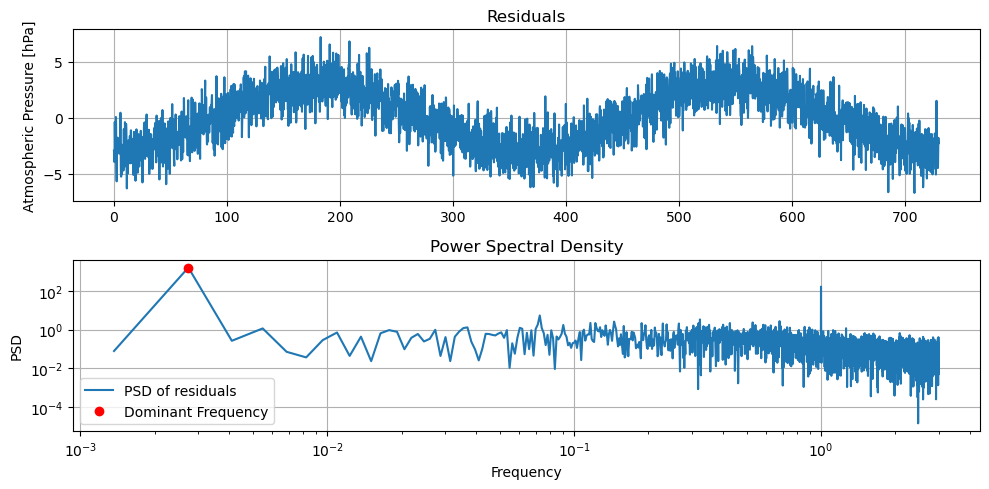

In [ ]:
# A = YOUR_CODE_HERE # A-matrix for linear trend (intercept and slope)
# dom_f = find_frequency(YOUR_CODE_HERE)
# print(f'Dominant Frequency: {YOUR_CODE_HERE} [YOUR_CODE_HERE]')

# SOLUTION
A = np.column_stack((np.ones(len(data)), time))
dom_f = find_frequency(data, time, A, fs)
print(f'Dominant Frequency: {dom_f*365:.3f} cycle/year')

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 1.4:</b>   
<p>
Look back at the plot of the original time series and confirm whether or not you can see the presence of the signal with the frequency found in the previous task. Write your answer in one sentence in the Markdown cell below.
</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Solution:</b>   
<p>
yes there is a clear yearly pattern in the data 
</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 1.5:</b>   
<p>
Find a second frequency by repeating the process. Before using <code>find_frequency</code> again, the linear trend and first periodic component should be accounted for.

Repeat this step until you have removed all dominant signals (you will have to determine when to stop).

Print the frequencies of all periodic signals found in the data.
</p>
</div>

Dominant Frequency: 1.000


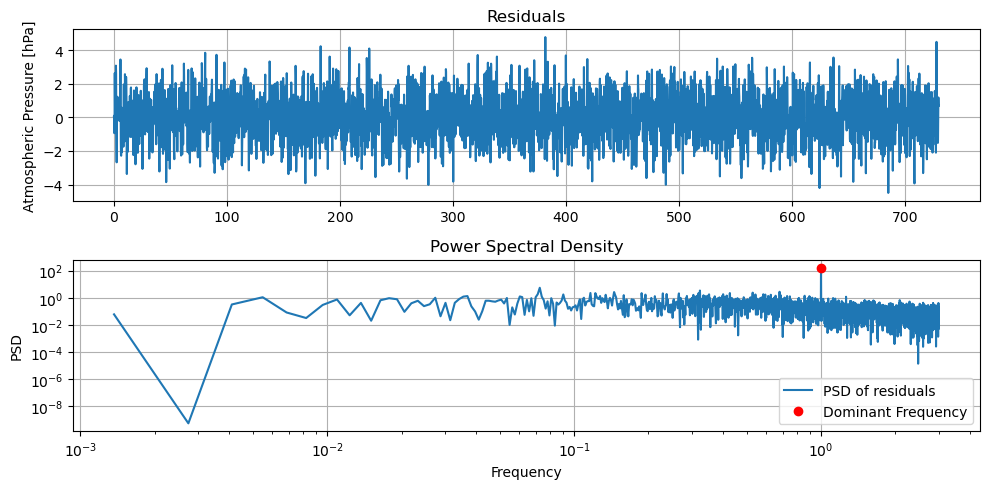

In [ ]:
# YOUR_CODE_HERE # may be more than one line or more than one cell

A2 = np.column_stack((A, np.cos(2*np.pi*dom_f*time), np.sin(2*np.pi*dom_f*time)))
dom_f2 = find_frequency(data, time, A2, fs)
print(f'Dominant Frequency: {dom_f2:.3f} cycle/day')

Dominant Frequency: 0.073


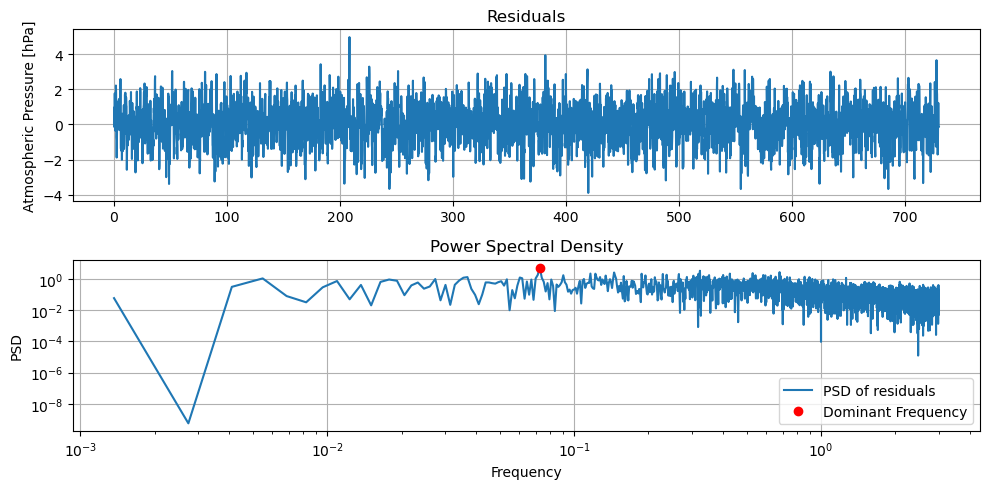

In [ ]:
# third model and third frequency

# SOLUTION
A3 = np.column_stack((A2, np.cos(2*np.pi*dom_f2*time), np.sin(2*np.pi*dom_f2*time)))
dom_f3 = find_frequency(data, time, A3, fs)
print(f'Dominant Frequency: {dom_f3:.3f} cycle/day')

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 1.6:</b>   
<p>
Describe the number of steps taken in the previous task and explain in your own words how the dominant frequencies were determined (print them, if you did not already do so).

How did you decide when to stop?

Is the final (detrended) time series (residuals) stationary? Explain.

</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Solution:</b>   
<p>

- First run: we fit a linear model to the data and find the dominant frequency of 1 cycle per year. PSD of the residuals are not stationary, so we need to do this again.
- Second run: we fit a model with a linear trend and a yearly cycle. We find a dominant frequency of 1 cycle per day.
- Third run: the highest PSD is a signal with frequency 0.07 cycle/day, which is about 3 orders of magnitude less than the previous run (comparing the order of magnitude on the y-axis between the previous two plots). Therefore, the third frequency is not necessary.
- The previous point illustrates that the detrended series is indeed stationary.

</p>
</div>

## Part 2: Fitting the functional model

In the next cell we will fit the model to generate stationary residuals. Above we have used for each dominant frequency $f_i$ ($i=1,2$) the model:

$$a_i  \cos(2\pi f_i  t) + b_i  \sin(2\pi f_i t)$$ 

However, to report the periodic signals we would like to have the amplitude, phase shift and the frequency of those signals, which can be recovered from:
$$A_i  \cos(2\pi f_i  t + \theta_i)$$
Where the amplitude $A_i = \sqrt{a_i^2 + b_i^2}$ and $\theta_i = \arctan(-b_i/a_i)$

Note: in Section 4.1 book this was shown where the angular frequency $\omega = 2\pi f$ was used.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 2:</b>   
<p>

Complete the missing parts of the code cell below to create the functional model.

</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>

If you want to compute the $\theta_i$ you can use the <code>np.arctan2</code> function. This function is a version of the arctan function that returns the angle in the correct quadrant. Using the <code>np.arctan</code> function will not give you the correct angle!</p></div>

In [7]:
def rewrite_seasonal_comp(ak, bk):
    '''
    Function to rewrite the seasonal component in terms of sin and cos
    ak: seasonal component coefficient for cos
    bk: seasonal component coefficient for sin
    '''
    Ak = np.sqrt(ak**2 + bk**2)
    theta_k = np.arctan2(-bk, ak)
    return Ak, theta_k

# creating the A matrix of the functional model
A = np.column_stack((   np.ones(len(data)), time,
                        np.cos(2*np.pi*dom_f*time), np.sin(2*np.pi*dom_f*time),
                        np.cos(2*np.pi*dom_f2*time), np.sin(2*np.pi*dom_f2*time)))

# Finding the Best Linear Unbiased Estimator
x_hat, y_hat, e_hat = fit_model(data, time, A)

# Extracting the seasonal component coefficients from the estimated parameters
a_i = np.array([x_hat[2], x_hat[4]])
b_i = np.array([x_hat[3], x_hat[5]])
freqs = np.array([dom_f, dom_f2])


print(f'Estimated Parameters:')
for i in range(len(x_hat)):
    print(f'x{i} = {x_hat[i]:.2f}')

print('\nThe seasonal component is rewritten as:')
i = 0
for a, b, f in zip(a_i, b_i, freqs):
    A_i, theta_i = rewrite_seasonal_comp(a, b)
    i = i + 1
    print(f'A_{i} = {A_i:.3f}, theta_{i} = {theta_i:.3f}, f_{i} = {f:.3f}')

Estimated Parameters:
x0 = 1012.92
x1 = 0.00
x2 = -2.99
x3 = 0.04
x4 = -0.07
x5 = -0.96

The seasonal component is rewritten as:
A_1 = 2.990, theta_1 = -3.128, f_1 = 0.003
A_2 = 0.959, theta_2 = 1.642, f_2 = 1.000


<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Task 4.2 was moved here, since it made more sense to interpret the parameters earlier.</p></div>



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 4.2:</b>   
<p>

- What can you say about the parameters, do the parameters make sense? 

- What time of the day is the pressure highest (on average)?
  
- What has the highest impact on the pressure, the daily or the yearly periodic signal?

</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Solution:</b>   
<p>
Yes, the parameters make sense. The average pressure is about 1013 hPa (the intercept); the slope is 0, so there is no increasing/decreasing trend. Looking at the periodic signals we can see that the daily parameter for theta is 1.6, which is around half of pi, or one-quarter of the daily period. Therefore, the cosine shifts to the left (by a quarter wavelength) and the pressure is lowest around 6 AM and highest around 6 PM (18:00), which would make sense physically for this (simulated) dataset. For the yearly cycles, theta_1 is about - pi, meaning that the cosine shifts to the right (by half a wavelength), meaning the lowest pressure is in Winder (Dec/Jan), and highest pressure in Summer (Jun/Jul). Finally, looking at the amplitude parameters, we can see that the yearly periodic signal has the highest impact on the pressure.
</p>
</div>

## Part 3: Analyzing the residuals
Now that we have our residuals we can fit an AR model to the residuals. We will start by plotting the ACF of the residuals. We will then fit an AR model to the residuals and report the parameters of the AR model..

### Part 3.1: Plot the ACF of the residuals


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 3.1:</b>   
<p>

Use the <code>plot_acf</code> function to plot the ACF of the residuals. 

</p>
</div>

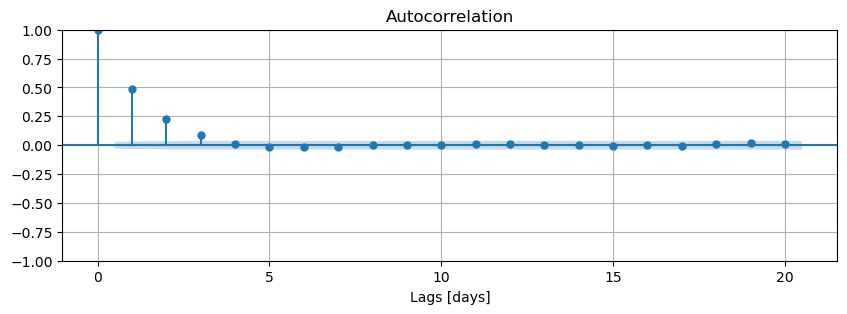

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
plot_acf(e_hat, ax=ax, lags=20);
ax.set_xlabel('Lags [days]')
ax.grid()



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 3.2:</b>   
<p>
What can you conclude from this ACF?
</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Solution:</b>   
<p>
The data is autocreated since lags are significant correlated (up to lag 3) 
</p>
</div>

### Fit an AR(1) model to the residuals

First we write a function `AR1` that will take the stationary residuals as input and return the parameters of the AR1 model. Then we will fit this model to the residuals and report the parameters.



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 3.3:</b>   
<p>
Complete the missing parts of the code cell below.
</p>
</div>

In [ ]:
def AR1(s, time, plot=True):
    '''
    Function to find the AR(1) model of the given data
    s: input data
    return: x_hat, e_hat
    '''
    y = s[1:]
    y_lag_1 = s[:-1]
    A = np.atleast_2d(y_lag_1).T
    x_hat, y_hat, e_hat = fit_model(y, time, A)
    if plot:
        plt.figure(figsize=(10, 3))
        plt.plot(time, y, label='Original Residuals')
        plt.plot(time, y_hat, label='Estimated Residuals')
        plt.xlabel('Time [days]')
        plt.ylabel('Atmospheric Pressure [hPa]')
        plt.title('Original Data vs Estimated Data')
        # plt.xlim([0, 100]) # uncomment this line to zoom in, for better visualization
        plt.grid(True)
        plt.legend()

    print(f'Estimated Parameters:')
    print(f'phi = {x_hat[0]:.4f}')

    return x_hat, e_hat


### Fit an AR1 model to the residuals

Fit an AR(1) model to the residuals of the functional model (found in Part 2), then report the parameters. We will need to check if the AR(1) model is a good fit to the residuals, although there are many ways to check whether this is the case. We can use a testing procedure to compare different AR models, an example of this can be found in the book.

Today is your lucky day: we will use a more simple method. If the AR(1) model is a good fit to the residuals, the residuals of the AR(1) model (output by the `AR1` function) should be white noise. We will plot the ACF of the residuals of the AR(1) model to check if this is the case.



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 3.4:</b>   
<p>
Complete the missing parts of the code cell below.
</p>
</div>

Estimated Parameters:
phi = 0.4908


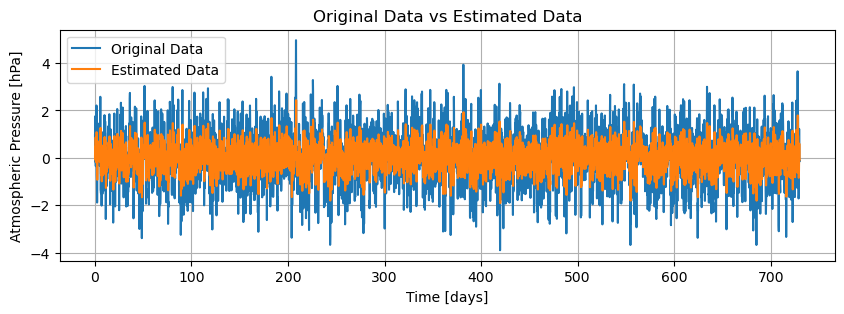

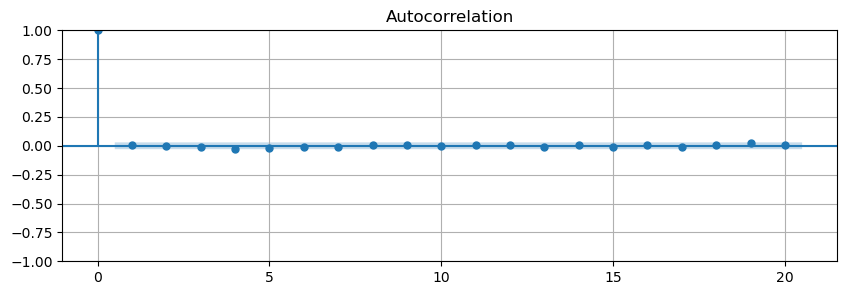

In [10]:
_, e_hat2 = AR1(e_hat, time[1:])

# Lets start with the ACF plot
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
plot_acf(e_hat2, ax=ax, lags=20);
ax.grid()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 3.5:</b>   
<p>

- What can you conclude from this ACF?
  
- Is the AR(1) model a good fit to the residuals?
  
- What would you do if the AR(1) model is not a good fit to the residuals?

</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Solution:</b>   
<p>
No autocorrelation in the residuals of the AR(1) model, so the AR(1) model is a good fit to the residuals. If the AR(1) model is not a good fit to the residuals we could try a higher order AR model.
</p>
</div>

## Part 4: Report the results

_This part is optional because it is not part of the book, and is not part of the exam material. However, it is a nice exercise to see how the uncertainty in our model parameters can be computed for situations where the observations are **not** independent. This is different from Q1 when we studied observation theory models with an assumption of independent observations. Maybe we will also (optionally) use this on Friday..._

Now that we have found the periodic signals in the data and fitted an AR model to the residuals, we can report the results. By combining including the AR (noise) process, we get residuals that are white noise. When the model hat white noise residuals, we can also report the confidence intervals of the model.

We will use the unbiased estimate of the variance of the residuals to calculate the confidence intervals. The unbiased estimate of the variance is given by:

$$\hat{\sigma}^2 = \frac{1}{n-p} \sum_{t=1}^{n} \hat{e}_t^2$$

Where $n$ is the number of observations and $p$ is the number of parameters in the model.

The covariance matrix of the parameters is given by:

$$\hat{\Sigma} = \hat{\sigma}^2 (\mathbf{A}^T \mathbf{A})^{-1}$$

Where $\mathbf{A}$ is the design matrix of the model.



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p> <b>Task 4.1:</b>   
<p>
Complete the missing parts of the code cell below.
</p>
</div>

Estimated Parameters (standard deviation):
x0 = 1012.918		 (0.032)
x1 = 0.000		 (0.000)
x2 = -2.990		 (0.021)
x3 = 0.041		 (0.023)
x4 = -0.068		 (0.021)
x5 = -0.957		 (0.021)
x6 = 0.491		 (0.013)

The seasonal component is rewritten as:
A_1 = 2.990, theta_1 = -3.128, f_1 = 0.003
A_2 = 0.959, theta_2 = 1.642, f_2 = 1.000


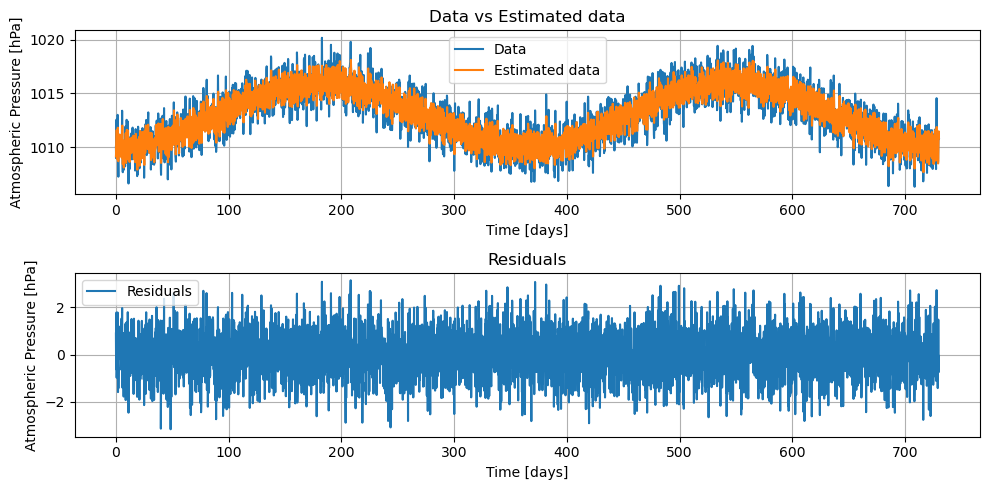

In [ ]:
# combine ar1 and seasonal model

A_final = np.column_stack((A[1:,:], e_hat[:-1]))
x_hat, y_hat, e_hat_final = fit_model(data[1:], time[1:], A_final, plot=True)

# compute the standard errors
N = A_final.shape[0]
p = A_final.shape[1]
sigma2 = np.sum(e_hat_final**2) / (N - p)
Cov = sigma2 * np.linalg.inv(A_final.T @ A_final)
se = np.sqrt(np.diag(Cov))

# Extracting the seasonal component coefficients from the estimated parameters
a_i = np.array([x_hat[2], x_hat[4]])
b_i = np.array([x_hat[3], x_hat[5]])
freqs = np.array([dom_f, dom_f2])

# Check if the number of coefficients match the number of frequencies
assert len(a_i) == len(b_i) == len(freqs), 'The number of coefficients do not match'

print(f'Estimated Parameters (standard deviation):')
for i in range(len(x_hat)):
    print(f'x{i} = {x_hat[i]:.3f}\t\t ({se[i]:.3f})')

print('\nThe seasonal component is rewritten as:')
i = 0
for a, b, f in zip(a_i, b_i, freqs):
    A_i, theta_i = rewrite_seasonal_comp(a, b)
    i = i + 1
    print(f'A_{i} = {A_i:.3f}, theta_{i} = {theta_i:.3f}, f_{i} = {f:.3f}')


<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Task 4.2 was moved above in the notebook, since it made more sense to interpret the parameters earlier.</p></div>

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    By <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE Team</a>
    &copy; 2024 TU Delft. 
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0</a>.
    <a rel="Zenodo DOI" href="https://doi.org/10.5281/zenodo.16782515"><img style="width:auto; height:15; vertical-align:middle" src="https://zenodo.org/badge/DOI/10.5281/zenodo.16782515.svg" alt="DOI https://doi.org/10.5281/zenodo.16782515"></a>
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->